In [2]:
import os
os.chdir('c:/Users/JAKE/Desktop/KDT 빅데이터 전문가 2기')

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('x_train 데이터의 형태:', x_train.shape)
print('x_train[0] 데이터의 형태:', x_train[0].shape)
print('y_train 데이터의 형태:', y_train.shape)

# y_train 데이터의 형태는 1차원이라서 (60000,)으로 출력됨

x_train 데이터의 형태: (60000, 28, 28)
x_train[0] 데이터의 형태: (28, 28)
y_train 데이터의 형태: (60000,)


In [4]:
num = x_train[0]
for i in range(28):
    for j in range(28):
        print('{:4d}'.format(num[i][j]), end='')
    print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

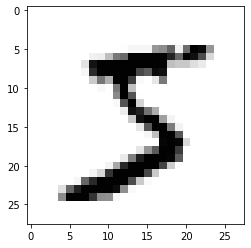

In [18]:
plt.imshow(num, cmap='Greys', interpolation='nearest');

In [6]:
# y_train[0] 배열에 5라고 레이블링 되어있음.
print('y_train[0] =', y_train[0])

y_train[0] = 5


In [7]:
x_train, x_test = x_train / 255, x_test / 255 # 입력값 정규화

model = keras.models.Sequential( [
    keras.layers.Flatten(input_shape = (28, 28)),   # Input Layer
    keras.layers.Dense(256, activation = 'relu'),   # Hidden Layer
    keras.layers.Dense(10, activation = 'softmax'), # Output Layer / 타겟값이 범주값인 경우 활성화 함수는 'softmax' 함수를 사용하자.
])

# 학습을 위한 최적화 함수, 손실 함수 등을 가진 모델을 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 5)

# epoch은 훈련수행 값

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2231 - accuracy: 0.9349
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0923 - accuracy: 0.9720
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0612 - accuracy: 0.9812
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0456 - accuracy: 0.9859
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0316 - accuracy: 0.9903


만든 신경망 모델이 어떤 형태를 가지고 있고, 몇 개의 파라미터를 훈련 시켜서 만든 모델인가를 **model.summary()** 함수를 통해 확인

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [9]:
print('신경망 모델의 학습 결과 :')
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('test 데이터의 손실값 =', eval_loss, 'test 데이터의 정확도 =', eval_acc)

신경망 모델의 학습 결과 :
313/313 [==============================] - 0s 856us/step - loss: 0.0752 - accuracy: 0.9756
test 데이터의 손실값 = 0.07519075274467468 test 데이터의 정확도 = 0.975600004196167


### 교수님 예제
학습데이터가 60,000개인 FASHION-MNIST 데이터 셋을 이용하여 아래와 같이 신경망 모델을 학습할 경우, 각 epoch 당 반복횟수(가중치 갱신 횟수)는 얼마일까?

In [15]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=64,
                   epochs=10, validation_split=0.25)

4431872/4422102 [==============================] - 0s 0us/step
Epoch 1/10
704/704 [==============================] - 1s 2ms/step - loss: 96.9680 - accuracy: 0.7076 - val_loss: 12.3446 - val_accuracy: 0.7513
Epoch 2/10
704/704 [==============================] - 1s 2ms/step - loss: 5.4448 - accuracy: 0.6893 - val_loss: 3.4663 - val_accuracy: 0.6805
Epoch 3/10
704/704 [==============================] - 1s 2ms/step - loss: 2.1481 - accuracy: 0.6771 - val_loss: 2.1151 - val_accuracy: 0.6822
Epoch 4/10
704/704 [==============================] - 1s 2ms/step - loss: 1.3732 - accuracy: 0.6996 - val_loss: 1.6155 - val_accuracy: 0.7002
Epoch 5/10
704/704 [==============================] - 1s 2ms/step - loss: 0.9725 - accuracy: 0.7303 - val_loss: 1.3430 - val_accuracy: 0.7425
Epoch 6/10
704/704 [==============================] - 1s 2ms/step - loss: 0.7999 - accuracy: 0.7582 - val_loss: 1.2250 - val_accuracy: 0.7619
Epoch 7/10
704/704 [==============================] - 1s 2ms/step - loss: 0.6903 - 